In [20]:
import pickle
import glob
import sys, copy
from astropy.table import Table
import numpy as np
import pyccl as ccl
sys.path.append('/pbs/throng/lsst/users/cpayerne/capish/')
import modules.simulation as simulation
import matplotlib.pyplot as plt
def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
import itertools

import configparser
default_config = configparser.ConfigParser()
default_config.read('../config/capish.ini')

simulator = simulation.UniverseSimulator(
                            default_config=default_config, 
                            variable_params_names=['Omega_m'])
Omegam_fid = [float(default_config['parameters']['Omega_m'])]
halo_cat_flagship = Table.read('../../capish_data/flagship.fits')
z = halo_cat_flagship['true_redshift_gal']
m200bh, m200ch, m500ch = halo_cat_flagship['m200b'], halo_cat_flagship['m200c'],halo_cat_flagship['m500c']
m200b, m200c, m500c = m200bh / 0.67, m200ch / 0.67, m500ch / 0.67


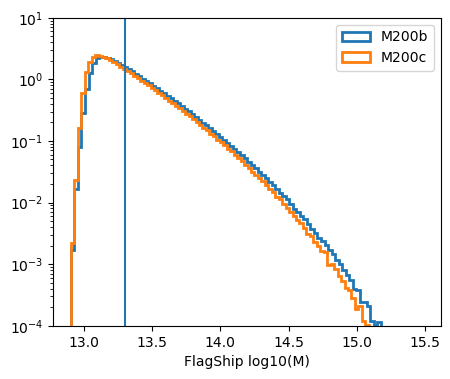

In [30]:
plt.figure(figsize=(5,4))
plt.hist(np.log10(m200b), bins=100, density=True, histtype='step', label = 'M200b', lw=2, )
plt.hist(np.log10(m200c), bins=100, density=True, histtype='step', label = 'M200c', lw=2)
plt.vlines(13.3, 0, 10.5)
plt.ylim(1e-4, 10)
plt.xlabel('FlagShip log10(M)')
plt.legend()
plt.yscale('log')